<a href="https://colab.research.google.com/github/KyPython/xor-neural-network-logic-to-perceptron/blob/main/XOR_Neural_Network_Logic_to_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A=0, B=0 -> H1=0, H2=0, O=0
A=0, B=1 -> H1=0, H2=1, O=1
A=1, B=0 -> H1=0, H2=1, O=1
A=1, B=1 -> H1=1, H2=1, O=0


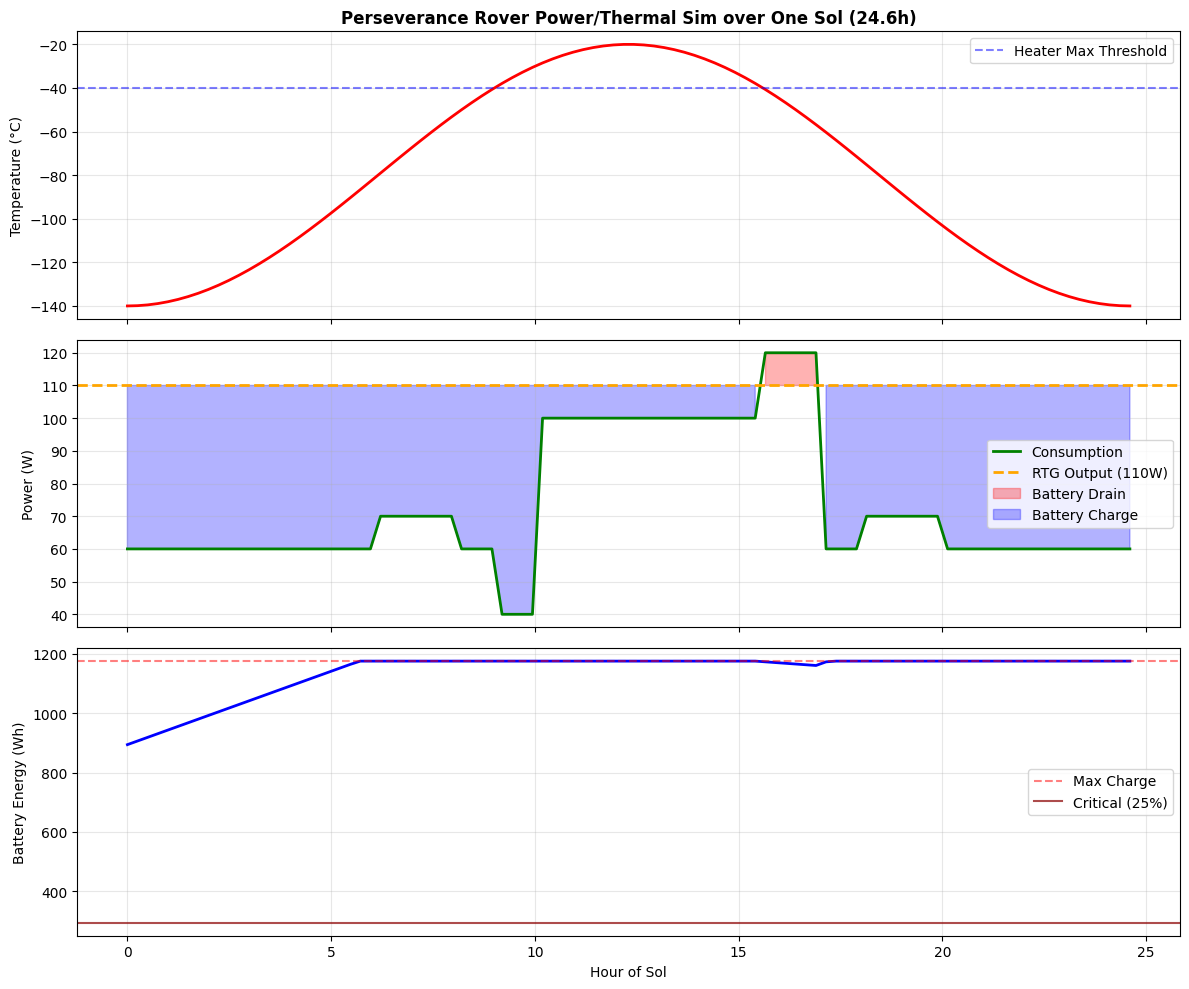


✅ Simulation run complete. Review the generated graph!


In [3]:
def step(x, threshold):
    return 1 if x >= threshold else 0

def xor_net(A, B):
    # Hidden layer
    H1 = step(A + B, threshold=2)  # AND-like
    H2 = step(A + B, threshold=1)  # OR-like

    # Output neuron: XOR = H2 AND NOT H1
    not_H1 = 1 - H1
    O = H2 * not_H1
    return H1, H2, O

for A in [0, 1]:
    for B in [0, 1]:
        H1, H2, O = xor_net(A, B)
        print(f"A={A}, B={B} -> H1={H1}, H2={H2}, O={O}")

import numpy as np
import matplotlib.pyplot as plt

class MarsRoverPowerSim:
    def __init__(self):
        # Constants
        self.rtg_power = 110  # Watts
        # Convert battery capacity (Ah) to Watt-hours (Wh) at 28V
        self.battery_capacity_Wh = 42 * 28
        self.sol_duration = 24.6  # hours

        # Temperature affects heater needs
        self.mars_temp_profile = self.generate_temp_profile()

    def generate_temp_profile(self):
        """Mars temperature over one sol (24.6 hours)."""
        hours = np.linspace(0, self.sol_duration, 100)
        # Sinusoidal approximation for temperature (-80C to -20C peak approx)
        temp = -80 + 60 * np.sin(2 * np.pi * hours / self.sol_duration - np.pi / 2)
        return temp

    def calculate_heater_power(self, temp):
        """Heaters needed to keep electronics warm based on temperature zones."""
        if temp < -40:
            return 50  # Max power
        elif temp < -20:
            return 30
        elif temp < 0:
            return 15
        else:
            return 5  # Minimal heat needed

    def simulate_sol(self):
        """Simulate full day of operations and track battery charge."""
        hours = np.linspace(0, self.sol_duration, 100)

        power_usage = []
        battery_charge = []
        # Initial battery charge at 75% for a typical start of sol
        current_battery = self.battery_capacity_Wh * 0.75

        # Power is consumed or gained at each timestep
        dt = self.sol_duration / 100

        for i, hour in enumerate(hours):
            temp = self.mars_temp_profile[i]

            # --- 1. Baseline Loads (Always On) ---
            computer = 5
            heater = self.calculate_heater_power(temp)
            baseline = computer + heater

            # --- 2. Science and Actuator Operations (Daytime) ---
            if 10 < hour < 17:  # Core operating window (e.g., 7 hours)
                science_actuators = 60  # High load for driving/instruments
            else:
                science_actuators = 0

            # --- 3. Communication Windows ---
            if 6 < hour < 8 or 18 < hour < 20: # Two orbit periods
                comm = 15
            else:
                comm = 5  # Listening/background comm

            total_power = baseline + science_actuators + comm

            # --- 4. Battery Management ---
            # Net power in Wh over this timestep (RTG output - consumption)
            net_power = (self.rtg_power - total_power) * dt
            current_battery += net_power

            # Clip battery charge to physical limits
            current_battery = np.clip(current_battery, 0, self.battery_capacity_Wh)

            power_usage.append(total_power)
            battery_charge.append(current_battery)

        return hours, power_usage, battery_charge

    def visualize(self):
        hours, power_list, battery_list = self.simulate_sol()
        power = np.array(power_list) # Convert to numpy array
        battery = np.array(battery_list) # Convert to numpy array

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

        # --- Temp Plot (Ax1) ---
        ax1.plot(hours, self.mars_temp_profile, 'r-', linewidth=2)
        ax1.set_ylabel('Temperature (°C)')
        ax1.set_title(f'Perseverance Rover Power/Thermal Sim over One Sol ({self.sol_duration}h)', fontweight='bold')
        ax1.axhline(y=-40, color='blue', linestyle='--', alpha=0.5, label='Heater Max Threshold')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # --- Power Plot (Ax2) ---
        ax2.plot(hours, power, 'g-', linewidth=2, label='Consumption')
        ax2.axhline(y=self.rtg_power, color='orange', linestyle='--',
                   linewidth=2, label=f'RTG Output ({self.rtg_power}W)')
        ax2.fill_between(hours, self.rtg_power, power,
                         where=(power > self.rtg_power), color='red', alpha=0.3, label='Battery Drain')
        ax2.fill_between(hours, self.rtg_power, power,
                         where=(power < self.rtg_power), color='blue', alpha=0.3, label='Battery Charge')
        ax2.set_ylabel('Power (W)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # --- Battery Plot (Ax3) ---
        ax3.plot(hours, battery, 'b-', linewidth=2)
        ax3.axhline(y=self.battery_capacity_Wh, color='r', linestyle='--', alpha=0.5, label='Max Charge')
        ax3.axhline(y=self.battery_capacity_Wh * 0.25, color='darkred', linestyle='-', alpha=0.7, label='Critical (25%)')
        ax3.set_ylabel('Battery Energy (Wh)')
        ax3.set_xlabel('Hour of Sol')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        return fig

# --- Execution ---
if __name__ == "__main__":
    sim = MarsRoverPowerSim()
    fig = sim.visualize()
    # In a real environment, this saves the image file
    # plt.savefig('mars_rover_power_sim.png', dpi=300, bbox_inches='tight')
    plt.show() # Use plt.show() to display the graph immediately
    print("\n✅ Simulation run complete. Review the generated graph!")